<a href="https://colab.research.google.com/github/MarcosVel/statistics-for-devs/blob/main/ExploratoryDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA com pandas

EDA - processo sistemático para entender e resumir as características fundamentais de um conjunto de dados.

VSCode extensão recomendada:
- Rainbow CSV

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Coleta e preparação dos dados

### Dataframe com base nos datasets

import dataset from google drive

In [3]:
# dataframe de clientes
df_customers = pd.read_csv('drive/MyDrive/Colab_Notebooks/Rocketseat/datasets/datasets_eda/churn_customers.csv')

In [4]:
df_customers.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
df_customers.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No
7042,3186-AJIEK,Male,0,No,No


In [6]:
# dataframe schema
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [7]:
# dataframe de servicos
df_services = pd.read_csv('drive/MyDrive/Colab_Notebooks/Rocketseat/datasets/datasets_eda/churn_services.csv')
df_services.head()

,customerID,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Yes,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Yes,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Yes,No,Fiber optic,No,No,No,No,No,No


In [8]:
df_services.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   PhoneService      7043 non-null   object
 2   MultipleLines     7043 non-null   object
 3   InternetService   7043 non-null   object
 4   OnlineSecurity    7043 non-null   object
 5   OnlineBackup      7043 non-null   object
 6   DeviceProtection  7043 non-null   object
 7   TechSupport       7043 non-null   object
 8   StreamingTV       7043 non-null   object
 9   StreamingMovies   7043 non-null   object
dtypes: object(10)
memory usage: 550.4+ KB


In [9]:
# dataframe de contratos
df_contracts = pd.read_csv('drive/MyDrive/Colab_Notebooks/Rocketseat/datasets/datasets_eda/churn_contracts.csv')
df_contracts.head()

,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df_contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 440.3+ KB


### Transformação de dados

In [11]:
# transformando a coluna TotalCharges em float
df_contracts.TotalCharges = pd.to_numeric(df_contracts.TotalCharges, errors='coerce')

In [12]:
df_contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7032 non-null   float64
 7   Churn             7043 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 440.3+ KB


após a transformação da coluna TotalCharges, a coluna passou a ter 11 valores ausentes

### Renomeando colunas

In [13]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [14]:
# renomeando a coluuna SeniorCitizen
df_customers.rename(columns={'SeniorCitizen':'Above65yo'}, inplace=True)

In [15]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7043 non-null   object
 1   gender      7043 non-null   object
 2   Above65yo   7043 non-null   int64 
 3   Partner     7043 non-null   object
 4   Dependents  7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [16]:
# renomeando lista - modificando todos os nomes das colunas
df_customers.columns = ['IDCliente', 'Genero', 'Mais65anos', 'PossuiParceiro', 'PossuiDependentes']

In [17]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   IDCliente          7043 non-null   object
 1   Genero             7043 non-null   object
 2   Mais65anos         7043 non-null   int64 
 3   PossuiParceiro     7043 non-null   object
 4   PossuiDependentes  7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


### Unificando dataframes

In [18]:
len(df_customers)

7043

In [19]:
len(df_services)

7043

In [20]:
len(df_contracts)

7043

In [21]:
# Renomear coluna
df_services.rename(columns={'customerID':'IDCliente'}, inplace=True)
df_services.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   IDCliente         7043 non-null   object
 1   PhoneService      7043 non-null   object
 2   MultipleLines     7043 non-null   object
 3   InternetService   7043 non-null   object
 4   OnlineSecurity    7043 non-null   object
 5   OnlineBackup      7043 non-null   object
 6   DeviceProtection  7043 non-null   object
 7   TechSupport       7043 non-null   object
 8   StreamingTV       7043 non-null   object
 9   StreamingMovies   7043 non-null   object
dtypes: object(10)
memory usage: 550.4+ KB


In [22]:
# Unificar dataframe df_customers e df_services, criando outro dataframe
df_temp = df_customers.merge(df_services, on=['IDCliente'])
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   IDCliente          7043 non-null   object
 1   Genero             7043 non-null   object
 2   Mais65anos         7043 non-null   int64 
 3   PossuiParceiro     7043 non-null   object
 4   PossuiDependentes  7043 non-null   object
 5   PhoneService       7043 non-null   object
 6   MultipleLines      7043 non-null   object
 7   InternetService    7043 non-null   object
 8   OnlineSecurity     7043 non-null   object
 9   OnlineBackup       7043 non-null   object
 10  DeviceProtection   7043 non-null   object
 11  TechSupport        7043 non-null   object
 12  StreamingTV        7043 non-null   object
 13  StreamingMovies    7043 non-null   object
dtypes: int64(1), object(13)
memory usage: 825.4+ KB


In [23]:
# Unificar dataframe df_temp e df_contracts, usando colunas de junção com nomes distintos
df_churn_temp = df_temp.merge(df_contracts, left_on=['IDCliente'], right_on=['customerID'])
df_churn_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDCliente          7043 non-null   object 
 1   Genero             7043 non-null   object 
 2   Mais65anos         7043 non-null   int64  
 3   PossuiParceiro     7043 non-null   object 
 4   PossuiDependentes  7043 non-null   object 
 5   PhoneService       7043 non-null   object 
 6   MultipleLines      7043 non-null   object 
 7   InternetService    7043 non-null   object 
 8   OnlineSecurity     7043 non-null   object 
 9   OnlineBackup       7043 non-null   object 
 10  DeviceProtection   7043 non-null   object 
 11  TechSupport        7043 non-null   object 
 12  StreamingTV        7043 non-null   object 
 13  StreamingMovies    7043 non-null   object 
 14  customerID         7043 non-null   object 
 15  tenure             7043 non-null   int64  
 16  Contract           7043 

In [24]:
# Unificar os três dataframes ao mesmo tempo, com colunas de nome diferentes
df_churn = df_customers.merge(df_services, on=['IDCliente']).merge(df_contracts, left_on=['IDCliente'], right_on=['customerID'])
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDCliente          7043 non-null   object 
 1   Genero             7043 non-null   object 
 2   Mais65anos         7043 non-null   int64  
 3   PossuiParceiro     7043 non-null   object 
 4   PossuiDependentes  7043 non-null   object 
 5   PhoneService       7043 non-null   object 
 6   MultipleLines      7043 non-null   object 
 7   InternetService    7043 non-null   object 
 8   OnlineSecurity     7043 non-null   object 
 9   OnlineBackup       7043 non-null   object 
 10  DeviceProtection   7043 non-null   object 
 11  TechSupport        7043 non-null   object 
 12  StreamingTV        7043 non-null   object 
 13  StreamingMovies    7043 non-null   object 
 14  customerID         7043 non-null   object 
 15  tenure             7043 non-null   int64  
 16  Contract           7043 

In [25]:
# removendo coluna repetida
df_churn.drop('customerID', axis=1, inplace=True)
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDCliente          7043 non-null   object 
 1   Genero             7043 non-null   object 
 2   Mais65anos         7043 non-null   int64  
 3   PossuiParceiro     7043 non-null   object 
 4   PossuiDependentes  7043 non-null   object 
 5   PhoneService       7043 non-null   object 
 6   MultipleLines      7043 non-null   object 
 7   InternetService    7043 non-null   object 
 8   OnlineSecurity     7043 non-null   object 
 9   OnlineBackup       7043 non-null   object 
 10  DeviceProtection   7043 non-null   object 
 11  TechSupport        7043 non-null   object 
 12  StreamingTV        7043 non-null   object 
 13  StreamingMovies    7043 non-null   object 
 14  tenure             7043 non-null   int64  
 15  Contract           7043 non-null   object 
 16  PaperlessBilling   7043 

## Dados ausentes



### Detectando valores ausentes

In [26]:
# detectando valores ausentes
df_churn.isna().sum()

IDCliente             0
Genero                0
Mais65anos            0
PossuiParceiro        0
PossuiDependentes     0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
tenure                0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges         11
Churn                 0
dtype: int64

In [27]:
# detectando linhas com valores ausentes
df_churn[df_churn.isna().any(axis=1)]

,IDCliente,Genero,Mais65anos,PossuiParceiro,PossuiDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,Yes,Yes,No,0,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,...,No,Yes,Yes,0,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,...,Yes,Yes,No,0,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,...,Yes,Yes,No,0,Two year,No,Mailed check,73.35,NaN,No


In [28]:
# quantas colunas tem valores ausentes?
df_churn.isna().any().sum()

1

### Removendo valores ausentes

In [29]:
# remover a coluna que possui valores ausentes
df_churn.drop(columns=['TotalCharges'], axis=1)

,IDCliente,Genero,Mais65anos,PossuiParceiro,PossuiDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,34,One year,No,Mailed check,56.95,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,Yes


In [30]:
# remover colunas com valores ausentes
df_churn.dropna(axis=1)

,IDCliente,Genero,Mais65anos,PossuiParceiro,PossuiDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,34,One year,No,Mailed check,56.95,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,Yes


In [31]:
# remover colunas onde todos os valores são ausentes - este dataset não possui
df_churn.dropna(axis=1, how='all')

,IDCliente,Genero,Mais65anos,PossuiParceiro,PossuiDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [32]:
# remover linhas com valores ausentes
df_churn.dropna()

,IDCliente,Genero,Mais65anos,PossuiParceiro,PossuiDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [33]:
# remover linhas com todos os valores ausentes - este dataset não possui
df_churn.dropna(how='all')

,IDCliente,Genero,Mais65anos,PossuiParceiro,PossuiDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### Substituindo valores ausentes

In [34]:
# preencher todos os valores ausentes com 0
naFilled = df_churn.fillna(0)

In [35]:
# encontrar linhas com valores de TotalCharges igual a 0
naFilled[naFilled.TotalCharges == 0]

,IDCliente,Genero,Mais65anos,PossuiParceiro,PossuiDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,Yes,Yes,No,0,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,...,No,Yes,Yes,0,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,...,Yes,Yes,No,0,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,...,Yes,Yes,No,0,Two year,No,Mailed check,73.35,0.0,No


In [36]:
# preencher valores padrão conforme coluna
df_churn.fillna(value={'TotalCharges': 0, 'Genero': 'Não declarado'})

,IDCliente,Genero,Mais65anos,PossuiParceiro,PossuiDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [37]:
# preencher os valores ausentes com a media
media_TotalCharges = df_churn.TotalCharges.mean()
media_TotalCharges

2283.3004408418656

In [38]:
df_churn.fillna(value={'TotalCharges': media_TotalCharges})

,IDCliente,Genero,Mais65anos,PossuiParceiro,PossuiDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## Análise univariada

### Distribuição em variáveis categóricas

**Hipoteses:**
- A faixa etária do cliente tem uma forte associação com o churn.
- Um cliente com menos de 6 meses de contrato é mais propenso ao churn.
- Cliente com contrato mensal é mais propenso ao churn.

In [39]:
# contar clientes usando a variavel churn como referência
df_churn.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [40]:
# como identificar valores possíveis (únicos) numa variável do dataframe
df_churn.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [41]:
# como é a distribução de clientes (%) abandonaram ou continuaram ativos
df_churn.Churn.value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

[Text(0, 0, '5174'), Text(0, 0, '1869')]

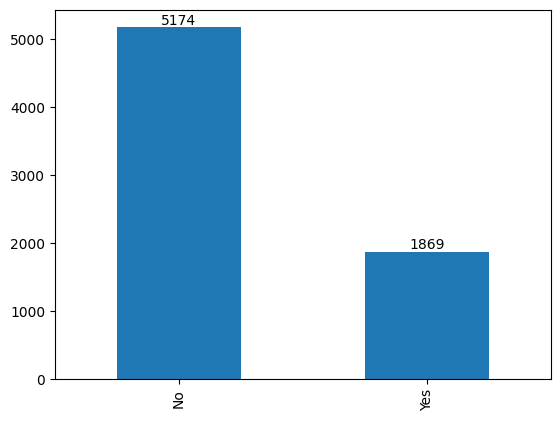

In [42]:
# plot distribuição churn (quantidade)
ax = df_churn.Churn.value_counts().plot.bar()
ax.bar_label(ax.containers[0])

[Text(0, 0, '0.73463'), Text(0, 0, '0.26537')]

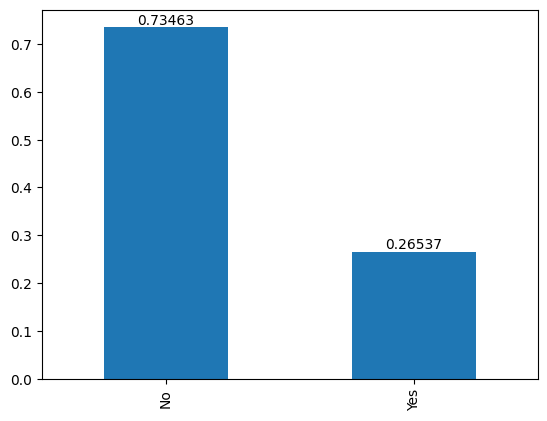

In [43]:
# plot distribuição churn (porcentagem)
ax = df_churn.Churn.value_counts(normalize=True).plot.bar()
ax.bar_label(ax.containers[0])

In [44]:
# quais são os tipos de contratos
df_churn.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

[Text(0, 0, '3875'), Text(0, 0, '1695'), Text(0, 0, '1473')]

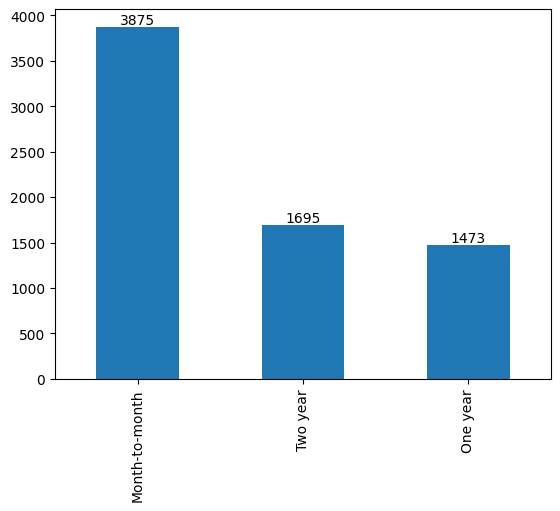

In [45]:
# plot distribuição contrato
ax = df_churn.Contract.value_counts().plot.bar()
ax.bar_label(ax.containers[0])

[Text(0, 0, '0.550192'), Text(0, 0, '0.240664'), Text(0, 0, '0.209144')]

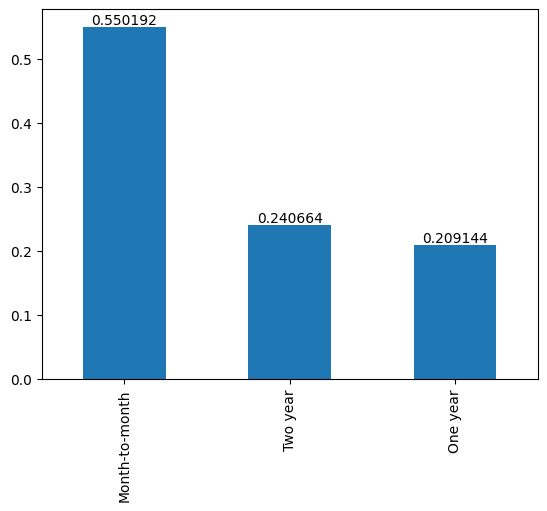

In [46]:
# plot distribuição contrato (porcentagem)
ax = df_churn.Contract.value_counts(normalize=True).plot.bar()
ax.bar_label(ax.containers[0])

### Distribuição em variáveis numéricas

Text(0.5, 0, 'Tempo de Contrato (meses)')

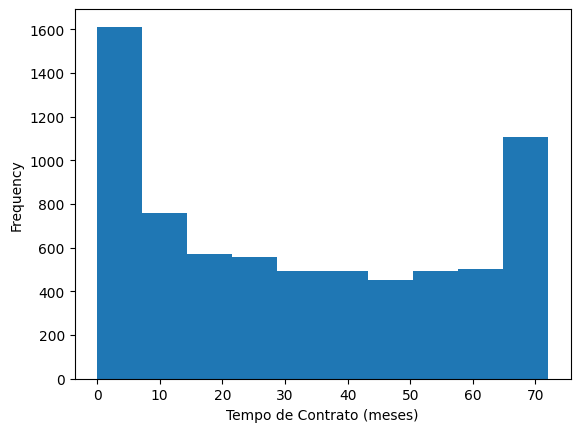

In [47]:
# histograma de tempo de contrato com x label - tempo de contrato
ax = df_churn.tenure.plot.hist()
ax.set_xlabel('Tempo de Contrato (meses)')

A variável tempo de contrato (tenure) não apresenta visualmente uma distribuição normal.

A grande parte dos valores se concentram nos extremos, ou seja, contratos com poucos meses de ativação e contratos longos, aproximadamente acima de 65 meses.

Text(0.5, 0, 'Custo Mensal')

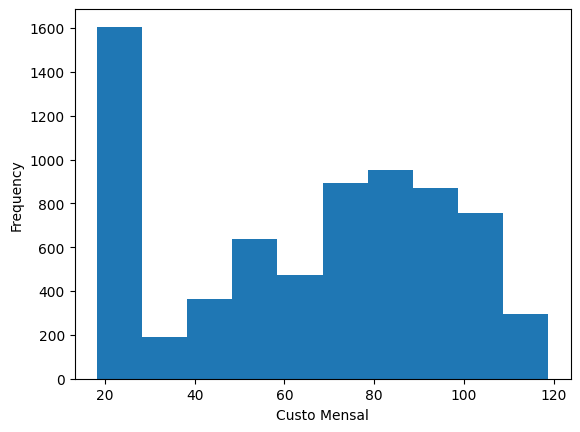

In [48]:
# histograma de MonthlyCharges
ax = df_churn.MonthlyCharges.plot.hist()
ax.set_xlabel('Custo Mensal')

In [49]:
# medidas de posição - media tempo de contrato
df_churn.tenure.mean()

32.37114865824223

In [50]:
# medidas de posição - mediana tempo de contrato
df_churn.tenure.median()

29.0

In [51]:
# medida de posição - moda tempo de contrato
df_churn.tenure.mode()

0    1
Name: tenure, dtype: int64

maioria dos clientes estão com 1 mês de contrato.

In [52]:
# medidas de dispersão - desvio padrão tempo de contrato
df_churn.tenure.std()

24.55948102309446

In [53]:
# medida de dispersão - coeficiente de variação tempo de contrato
df_churn.tenure.std() / df_churn.tenure.mean() * 100

75.86842617906674

## Filtros e Agrupamentos

In [61]:
# filtrar clientes com até 1 mes de contrato
df_churn[df_churn.tenure <= 1]

,IDCliente,Genero,Mais65anos,PossuiParceiro,PossuiDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,8779-QRDMV,Male,1,No,No,No,No phone service,DSL,No,No,...,No,No,Yes,1,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,1066-JKSGK,Male,0,No,No,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,1,Month-to-month,No,Mailed check,20.15,20.15,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,No,Electronic check,30.20,30.20,Yes
33,7310-EGVHZ,Male,0,No,No,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,1,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6979,5351-QESIO,Male,0,No,Yes,No,No phone service,DSL,No,No,...,No,No,No,1,Month-to-month,No,Mailed check,24.20,24.20,No
7010,0723-DRCLG,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,1,Month-to-month,Yes,Electronic check,74.45,74.45,Yes
7016,1471-GIQKQ,Female,0,No,No,Yes,No,DSL,No,Yes,...,No,No,No,1,Month-to-month,No,Electronic check,49.95,49.95,No
7018,1122-JWTJW,Male,0,Yes,Yes,Yes,No,Fiber optic,No,No,...,No,No,No,1,Month-to-month,Yes,Mailed check,70.65,70.65,Yes


In [70]:
# quantos clientes de 1 mes de contrato - porcentagem
len(df_churn[df_churn.tenure == 1]) / len(df_churn) * 100

8.70367741019452

In [72]:
# quantos clientes entre 1 e 6 meses de contrato
len(df_churn[(df_churn.tenure >= 1) & (df_churn.tenure <= 6)])

1470

In [73]:
# apresentar a quantidade de clientes por tempo de contrato - agrupamento com sumarização
df_churn.groupby(['tenure'])['tenure'].count()

tenure
0      11
1     613
2     238
3     200
4     176
     ... 
68    100
69     95
70    119
71    170
72    362
Name: tenure, Length: 73, dtype: int64

In [75]:
# rankear os clientes por tempo de contrato
df_churn.groupby(['tenure'])['tenure'].count().sort_values(ascending=False)

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

<Axes: ylabel='tenure'>

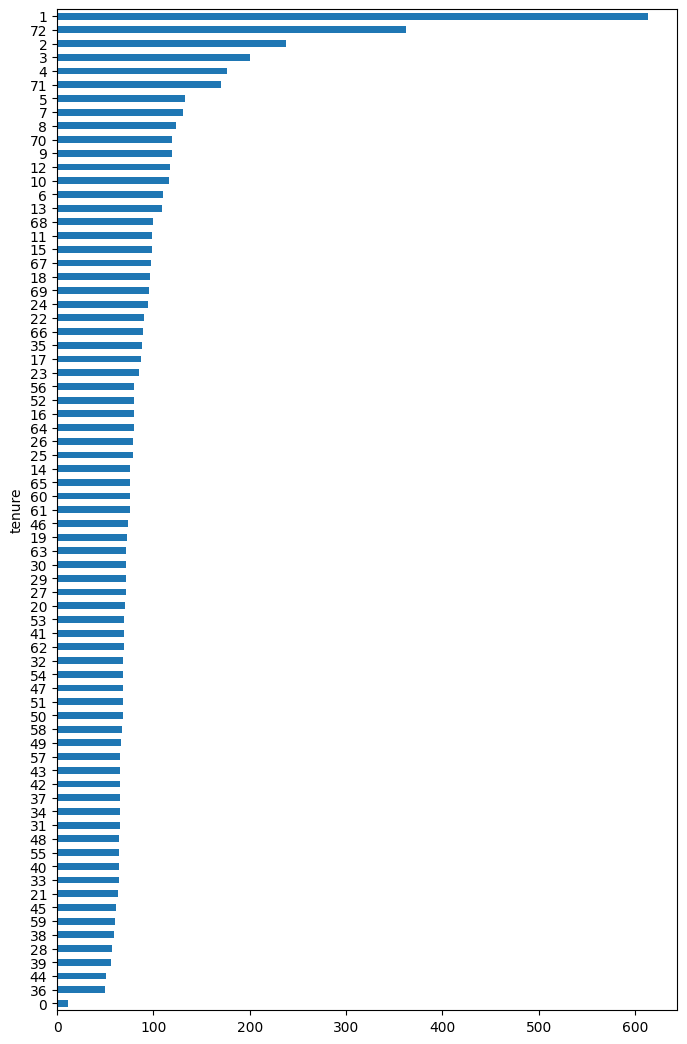

In [83]:
# plotar os clientes por tempo de contrato
df_churn.groupby(['tenure'])['tenure'].count().sort_values().plot.barh(figsize=(8, 13))